In [30]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
from hepstats.modeling import bayesian_blocks


def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)


def bayesian_blocks_mod(y):
    if len(np.unique(y))==1:
        return None
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]

def print_stats(y):
    print(f'{np.mean(y):5.5} +/- {np.std(y):5.5}')
    
def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.5} +/- {y_std:5.5}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()


# spin/orbit UQ

## spin part, before cuts

(2, 499200)


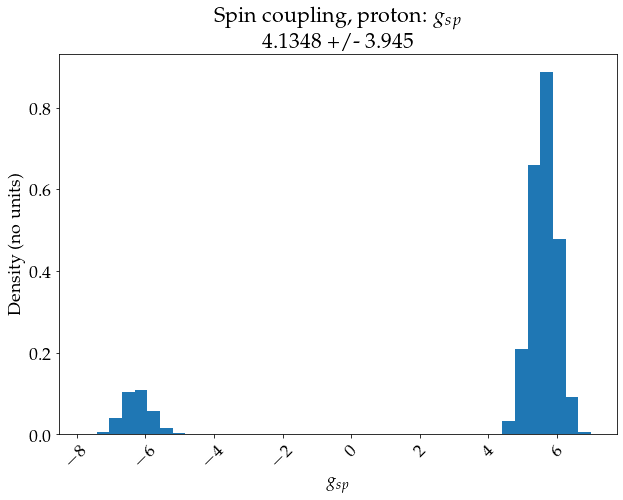

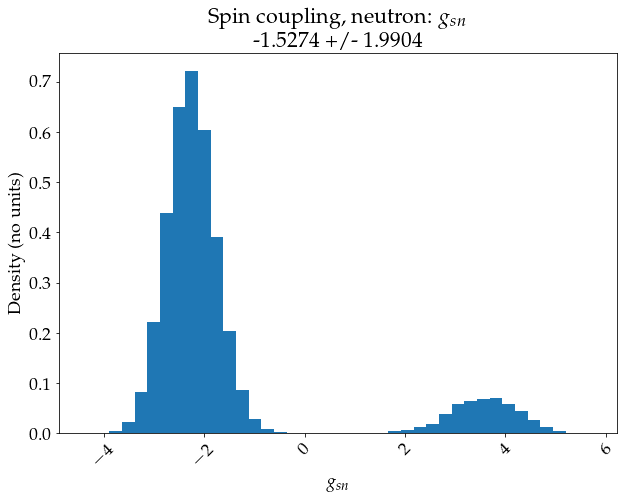

In [31]:
with open('traces_v4.0.pkl','rb') as fh:
    chain = pkl.load(fh)

    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(2,-1))
print(chain.shape)

g_sp_trace = chain[0].flatten()
g_sn_trace = chain[1].flatten()
make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')

## spin part, after cuts

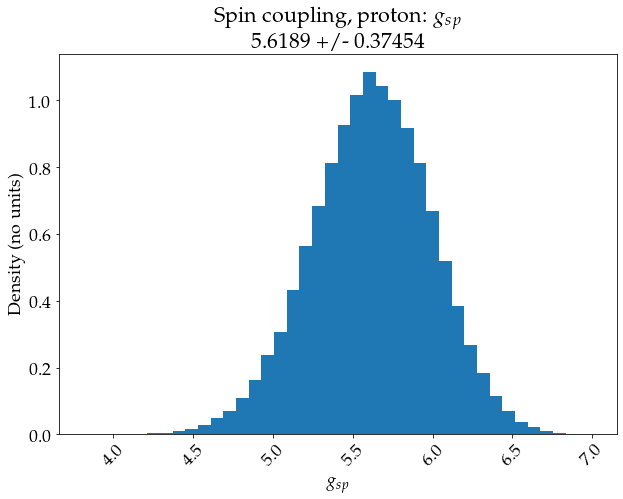

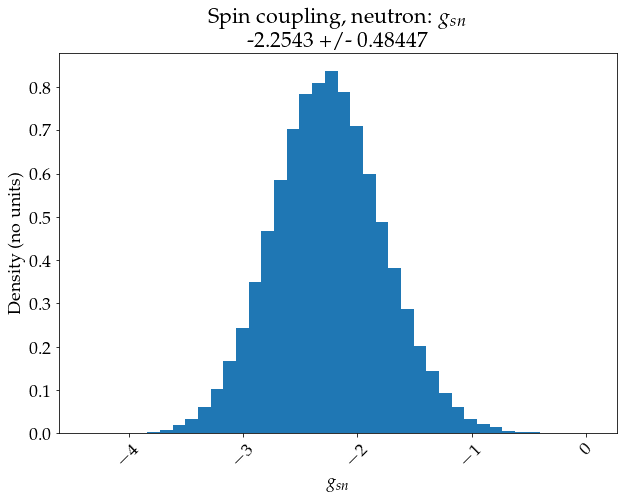

In [32]:
g_sp_low_limit = 2
g_sp_top_limit = 8
g_sn_low_limit = -5
g_sn_top_limit = 0

# indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit) & (g_sn_trace > g_sn_low_limit) & (g_sn_trace < g_sn_top_limit)  
indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit)  
g_sp_trace = g_sp_trace[indices]
g_sn_trace = g_sn_trace[indices]


make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')

cc = 0.555


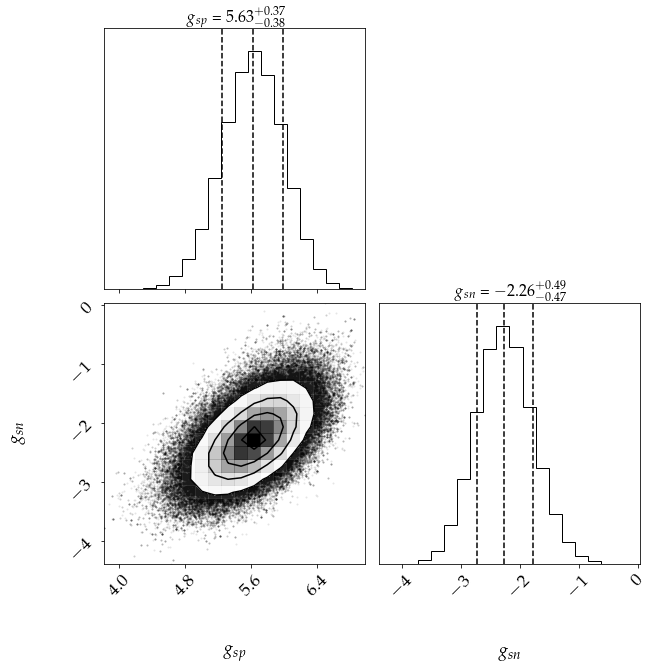

In [33]:
import corner

# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{sn}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)

print(f'cc = {np.corrcoef(data.T)[0,1]:3.3}')

## orbit part, before cuts

(2, 499200)


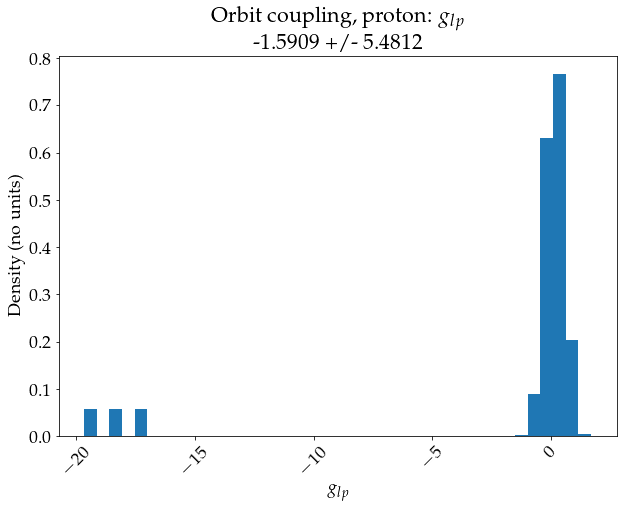

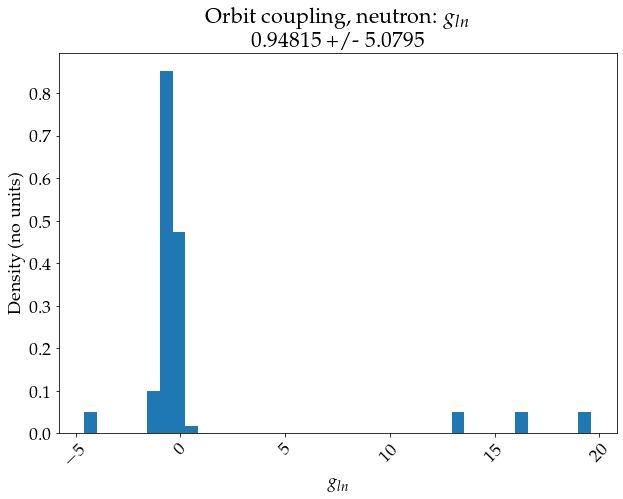

In [34]:
with open('traces_v4.1.pkl','rb') as fh:
    chain = pkl.load(fh)

    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(2,-1))
print(chain.shape)

g_lp_trace = chain[0].flatten()
g_ln_trace = chain[1].flatten()
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

## orbit part, after cuts

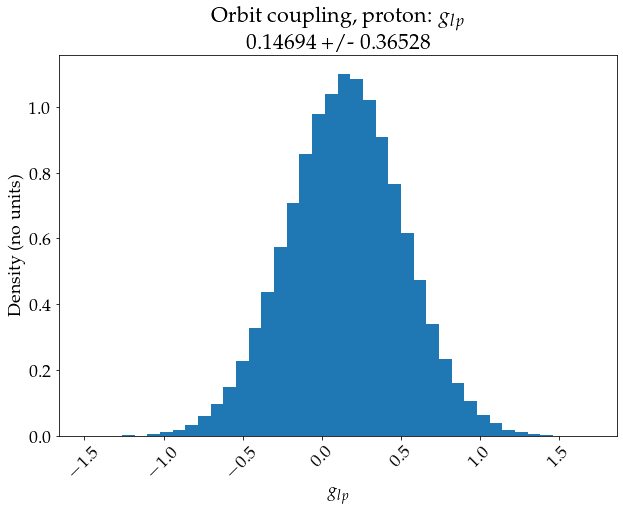

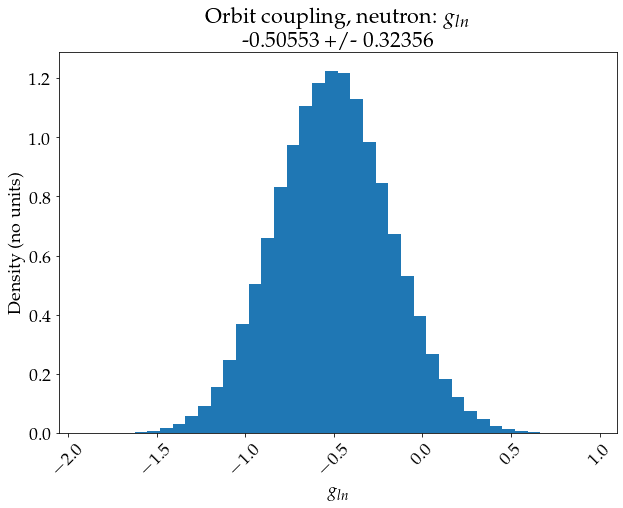

In [35]:
g_lp_low_limit = -3
g_lp_top_limit = 3
g_ln_low_limit = -3
g_ln_top_limit = 3

indices = (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit) & (g_ln_trace > g_ln_low_limit) & (g_ln_trace < g_ln_top_limit)  
# indices = (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit)  
g_lp_trace = g_lp_trace[indices]
g_ln_trace = g_ln_trace[indices]


make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

cc = 0.907


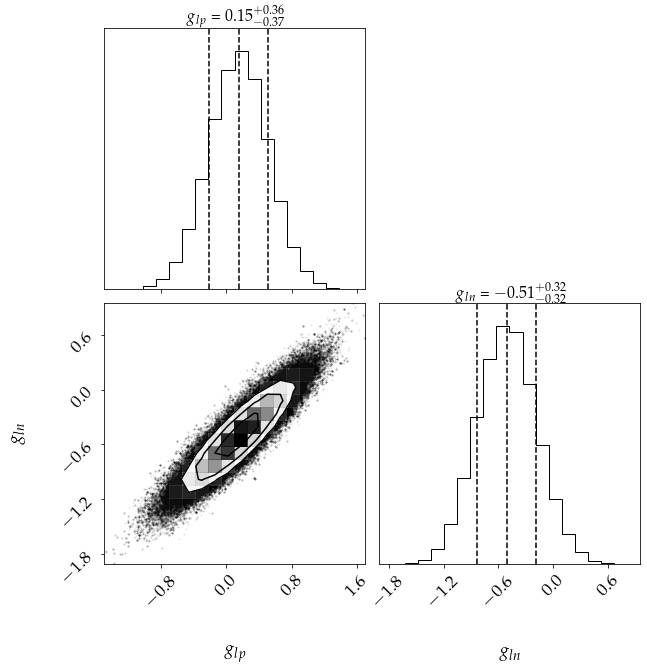

In [36]:
import corner

data = np.array([g_lp_trace.flatten(),g_ln_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{lp}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)
print(f'cc = {np.corrcoef(data.T)[0,1]:3.3}')

# proton/neutron UQ

## proton part, before cuts

(2, 499200)


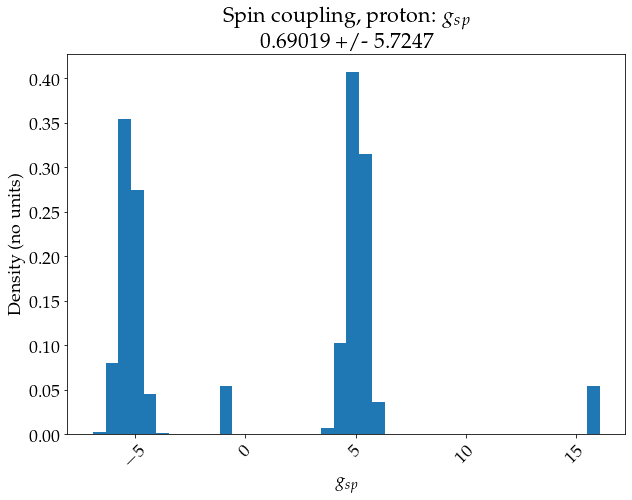

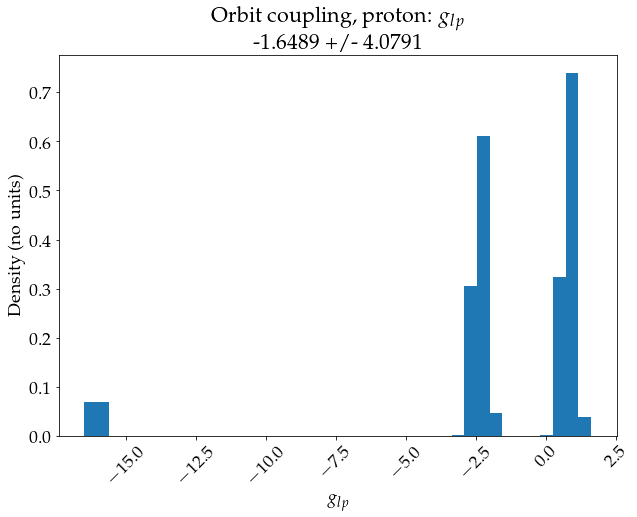

In [37]:
with open('traces_v4.2.pkl','rb') as fh:
    chain = pkl.load(fh)

    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(2,-1))
print(chain.shape)

g_sp_trace = chain[0].flatten()
g_lp_trace = chain[1].flatten()
make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')

## proton part, after cuts

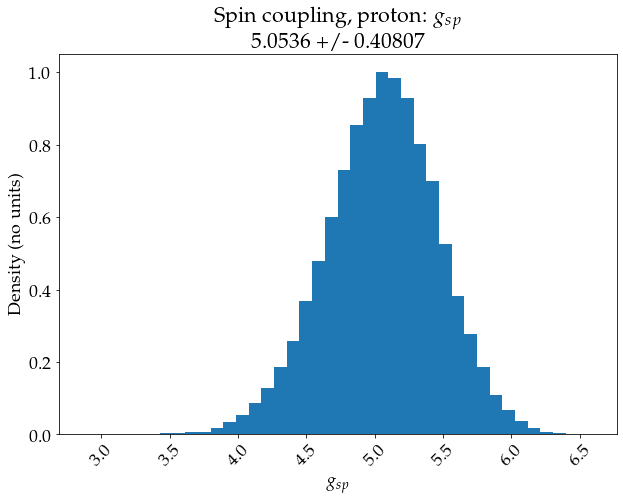

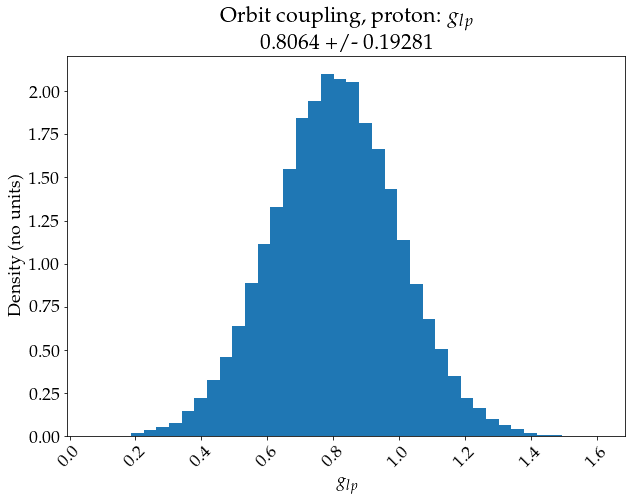

In [38]:
g_sp_low_limit = 2
g_sp_top_limit = 8
g_lp_low_limit = -5
g_lp_top_limit = 5

# indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit) & (g_sn_trace > g_sn_low_limit) & (g_sn_trace < g_sn_top_limit)  
indices = (g_sp_trace > g_sp_low_limit) & (g_sp_trace < g_sp_top_limit)  
g_sp_trace = g_sp_trace[indices]
g_lp_trace = g_lp_trace[indices]


make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')

cc = -0.596


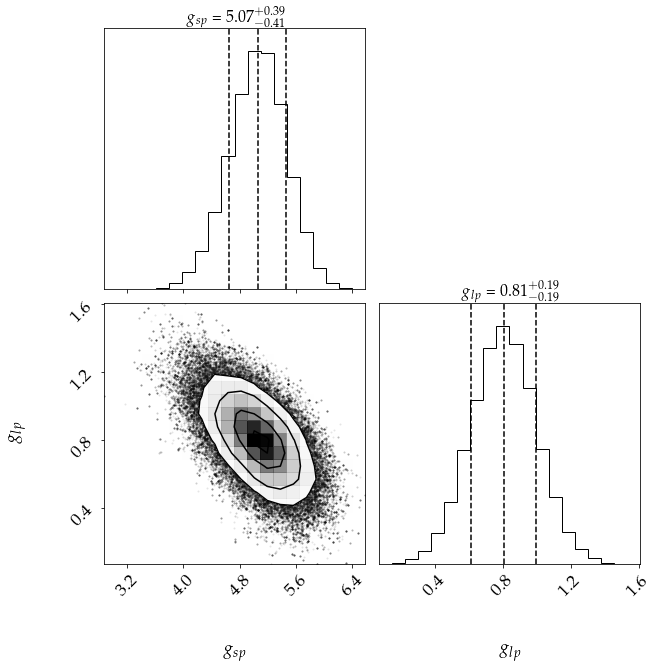

In [39]:
import corner

# data = np.array([g_sp_trace.flatten(),g_sn_trace.flatten(),g_lp_trace.flatten(),g_ln_trace.flatten()]).T
data = np.array([g_sp_trace.flatten(),g_lp_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sp}$',r'$g_{lp}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)
print(f'cc = {np.corrcoef(data.T)[0,1]:3.3}')

## neutron part, before cuts

(2, 499200)


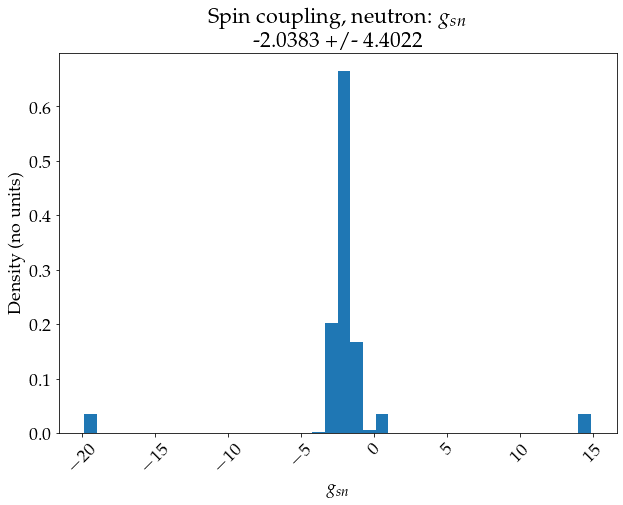

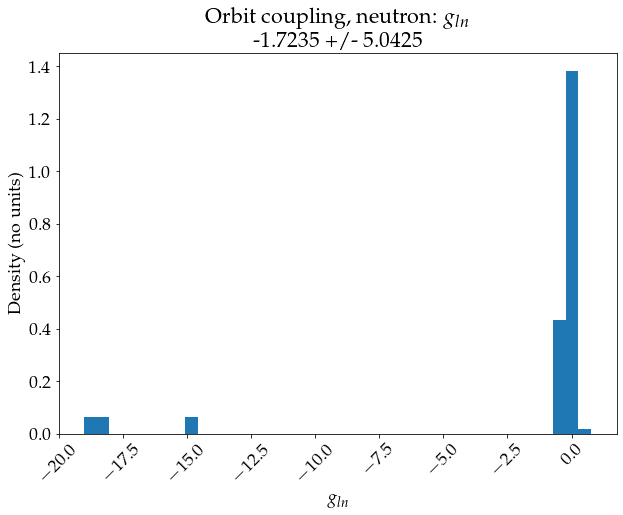

In [40]:
with open('traces_v4.3.pkl','rb') as fh:
    chain = pkl.load(fh)

    
warmup = 400
chain = chain[:,warmup:,:]
chain = np.reshape(chain.T,(2,-1))
print(chain.shape)

g_sn_trace = chain[0].flatten()
g_ln_trace = chain[1].flatten()
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

## neutron part, after cuts

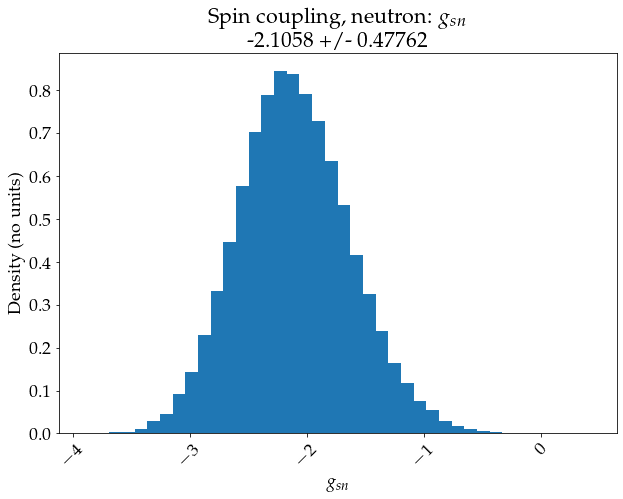

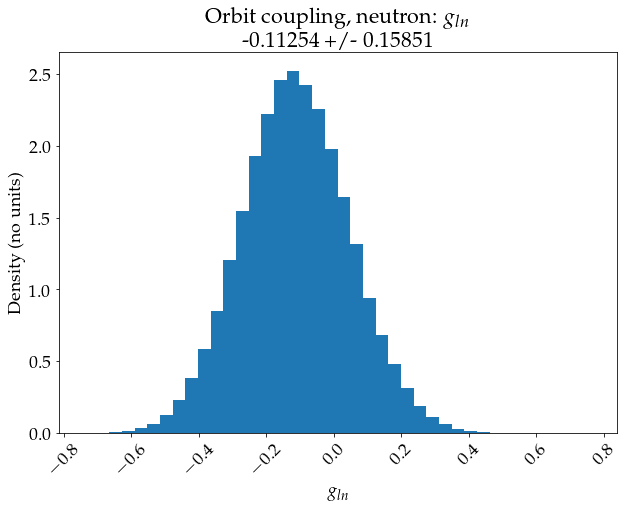

In [41]:
g_sn_low_limit = -3
g_sn_top_limit = 3
g_ln_low_limit = -3
g_ln_top_limit = 3

# indices = (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit) & (g_ln_trace > g_ln_low_limit) & (g_ln_trace < g_ln_top_limit)  
# indices = (g_lp_trace > g_lp_low_limit) & (g_lp_trace < g_lp_top_limit)  
indices = (g_ln_trace > g_ln_low_limit) & (g_ln_trace < g_ln_top_limit)  
g_sn_trace = g_sn_trace[indices]
g_ln_trace = g_ln_trace[indices]


make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

cc = -0.503


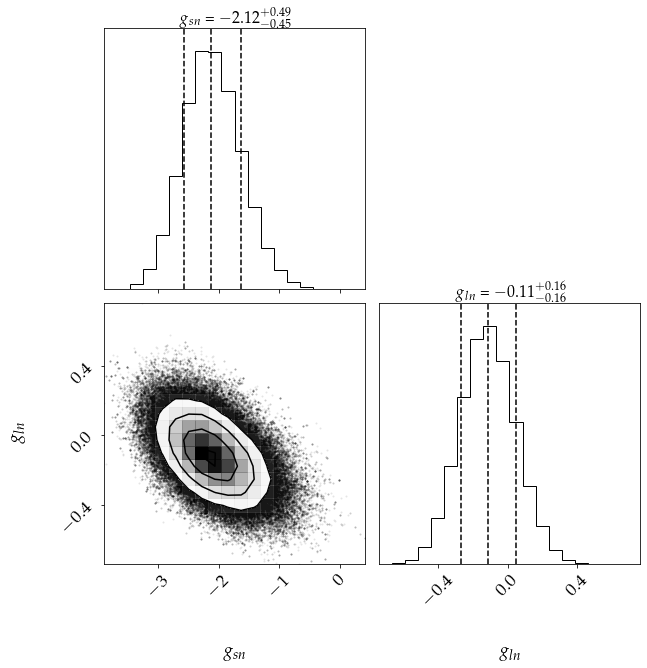

In [42]:
import corner

data = np.array([g_sn_trace.flatten(),g_ln_trace.flatten()]).T

f = plt.figure(figsize=(10,10))
figure = corner.corner(data,
                       labels=[r'$g_{sn}$',r'$g_{ln}$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 16},
                      fig=f)
print(f'cc = {np.corrcoef(data.T)[0,1]:3.3}')